In [1]:
# Importação das bibliotecas

import pandas as pd                                     # Biblioteca para manipulação de dados
import numpy as np                                      # Biblioteca para trabalhar com manipulação de numeros
import seaborn as sns                                   # Biblioteca para visualização de gráficos
import matplotlib                                       # Biblioteca para visualização de gráficos  
import matplotlib.pyplot as plt                         # Biblioteca para plotar gráficos
import plotly                                           # Biblioteca para plotar gráficos
import plotly.express as px                             # Biblioteca para plotar gráficos
from sklearn.preprocessing import StandardScaler        # importando a biblioteca para padronização dos valores
from sklearn.model_selection import train_test_split    # importando a biblioteca para separação dos dados de treino e teste
import pickle                                           # importando a biblioteca para salvar o modelo
from sklearn.naive_bayes import GaussianNB              # importando a biblioteca para o modelo de Naive Bayes
from sklearn.metrics import accuracy_score              # importando a biblioteca para a avaliação da acurácia
from sklearn.metrics import confusion_matrix            # importando a biblioteca para a matriz de confusão
from sklearn.metrics import classification_report       # importando a biblioteca para o relatório de classificação
from sklearn import tree                                # importando a biblioteca para o modelo de árvore de decisão
from sklearn.tree import DecisionTreeClassifier         # importando a biblioteca para o modelo de árvore de decisão
from sklearn.ensemble import RandomForestClassifier     # importando a biblioteca para o modelo de Random Forest
from sklearn.neighbors import KNeighborsClassifier      # importando a biblioteca para o modelo de KNN


In [2]:
# visualização das versões das bibliotecas, importante verificação pois algumas funcionalidades estão presentes nessas versões

print('Versão do Matplotlib :',matplotlib.__version__)
print('Versão do Seaborn    :',sns.__version__)
print('Versão do Plotly     :',plotly.__version__)
print('Versão do Pandas     :',pd.__version__)
print('Versão do Numpy      :',np.__version__)

Versão do Matplotlib : 3.5.1
Versão do Seaborn    : 0.11.1
Versão do Plotly     : 5.3.1
Versão do Pandas     : 1.2.4
Versão do Numpy      : 1.19.5


In [3]:
# Carregamento da base de dados em uma variável

base_credit = pd.read_csv('./data/credit_data.csv')
# 'credit_data.csv' é um arquivo com alguns dados que possui informações sobre empréstimos (se o cliente pagará ou não pagará o empréstimo)

In [4]:
# visualização dos primeiros registros da base de dados

base_credit.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [5]:
# dicionario das variáveis

# i#clientid    - id do cliente                             / variavel categorica e nominal 
# income        - renda do cliente                          / variavel numérica e continua
# age           - idade do cliente                          / variavel numérica e continua
# loan          - empréstimo do cliente( divida )           / variavel numérica e continua

In [6]:
# visualização de estatísticas da base de dados

#base_credit.describe(include='all')                                 # incluindo todas as variáveis
base_credit.describe()                                               # apenas as variáveis numéricas

,i#clientid,income,age,loan,c#default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [7]:
# visualização do cliente que tem a maior renda

base_credit[base_credit.income == base_credit.income.max()]

,i#clientid,income,age,loan,c#default
422,423,69995.685578,52.719673,2084.370861,0


In [8]:
# visualização do cliente que tem a menor divida

base_credit[base_credit.loan == base_credit.loan.min()]

,i#clientid,income,age,loan,c#default
865,866,28072.604355,54.142548,1.37763,0


In [9]:
# visualização das classes do atributo default em percentual

print('Quantidade por classe :\n', base_credit['c#default'].value_counts())
print('\nQuantidade por classe(%) :\n',base_credit['c#default'].value_counts(normalize=True))

Quantidade por classe :
 0    1717
1     283
Name: c#default, dtype: int64

Quantidade por classe(%) :
 0    0.8585
1    0.1415
Name: c#default, dtype: float64


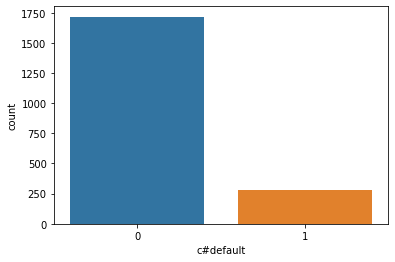

In [10]:
# visualização das classes do atributo default graficamente

sns.countplot(x='c#default', data=base_credit);

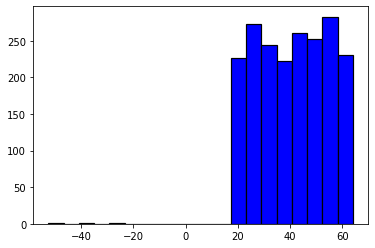

In [11]:
# visualização grafica das idades dos clientes

plt.hist(base_credit.age, bins=20, color='blue', edgecolor='black', linewidth=1.2);

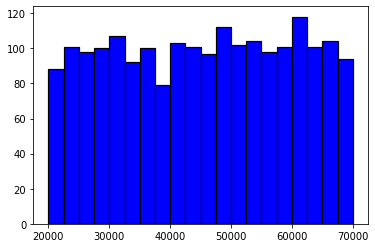

In [12]:
# visualização grafica das rendas dos clientes

plt.hist(base_credit.income, bins=20, color='blue', edgecolor='black', linewidth=1.2);

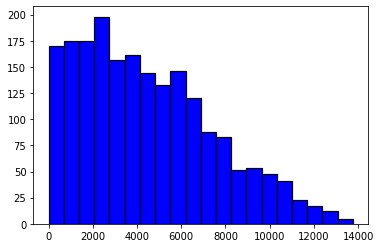

In [13]:
# visualização grafica das dividas dos clientes

plt.hist(base_credit.loan, bins=20, color='blue', edgecolor='black', linewidth=1.2);

In [14]:
# visualização grafica de todos os atributos com diferências entre classes

grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='c#default')
grafico.show()

In [15]:
# tratamento de valores incosistentes na base de dados

In [16]:
# encontrando os valores inconsistentes

# base_credit.loc[base_credit.age < 0]  # outra forma para encontrar valores negativos de idade
base_credit[base_credit['age'] < 0]

,i#clientid,income,age,loan,c#default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [17]:
# apagando os valores inconsistentes com o comando drop e filtro dos valores negativos

base_credit2 = base_credit.drop(base_credit[base_credit.age < 0].index)
base_credit2

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [18]:
# visualização dos registros após o tratamento

base_credit2[base_credit2['age'] < 0]

,i#clientid,income,age,loan,c#default


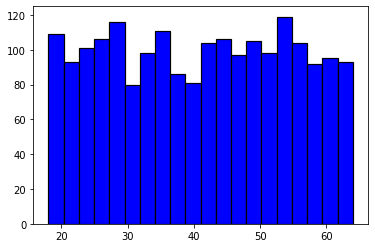

In [19]:
# visualização grafica das idades dos clientes após o tratamento

plt.hist(base_credit2.age, bins=20, color='blue', edgecolor='black', linewidth=1.2);

In [20]:
# substituindo os valores negativos de idade pela média da idade

In [21]:
# valor médio da idade com todos os valores

base_credit.age.mean()

40.80755937840458

In [22]:
# valor médio da idade apenas com os valores positivos

base_credit.age[base_credit.age > 0].mean()

40.92770044906149

In [23]:
# substituindo os valores negativos de idade pela média da idade apenas dos valores positivos

base_credit.loc[base_credit['age'] < 0, 'age'] = base_credit.age[base_credit.age > 0].mean()

In [24]:
# verificação dos valores após o tratamento

base_credit.loc[base_credit['age'] < 0]

,i#clientid,income,age,loan,c#default


In [25]:
# verificação dos registros após o tratamento

base_credit.head(27)

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [26]:
# visualização grafica de todos os atributos com diferências entre classes após o tratamento

grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='c#default')
grafico.show()

In [27]:
# tratamento de valores faltantes

In [28]:
# visualização da quantidade de valores faltantes

base_credit.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [29]:
# visualização dos registros com valores faltantes

base_credit.loc[pd.isnull(base_credit['age'])]

,i#clientid,income,age,loan,c#default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [30]:
# substituindo os valores faltantes pela média da idade

base_credit['age'].fillna(base_credit['age'].mean(), inplace=True)

In [31]:
# visualização dos registros com valores faltantes após o tratamento

base_credit.loc[pd.isnull(base_credit['age'])]

,i#clientid,income,age,loan,c#default


In [32]:
# verificação dos registros após o tratamento

base_credit.loc[(base_credit['i#clientid'] == 29) | (base_credit['i#clientid'] == 31) | (base_credit['i#clientid'] == 32)]

,i#clientid,income,age,loan,c#default
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


In [33]:
# verificação dos registros após o tratamento

base_credit.loc[base_credit['i#clientid'].isin([29, 31, 32])]

,i#clientid,income,age,loan,c#default
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


In [34]:
# dividindo a base de dados em atributos e classes

In [35]:
# atribuindo dados previsores a uma varivel, valores são convertido para array

X_credit = base_credit.iloc[:, 1:4].values

In [36]:
# visualização dos atributos previsores em array

X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [37]:
# valores das classes para previsão a uma varivel, valores são convertido para array

y_credit = base_credit.iloc[:, 4].values

In [38]:
# visualização dos valores das classes em array

y_credit

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [39]:
# escalonamento dos valores pois os valores tem uma diferença grande entre os valores
# importante que seja feito uma padronização dos valores
# alguns algortimos usam distancias euclidianas entre os valores isso pode dificultar o aprendizado

In [40]:
# visualização dos valores maximos e minimos de renda(coluna 0), idade(coluna 1) e divida(coluna 2)

print('valores minimo e maximo da renda  ', X_credit[:,0].min(), X_credit[:,0].max())    # valores minimo e maximo da renda
print('valores minimo e maximo da idade  ', X_credit[:,1].min(), X_credit[:,1].max())    # valores minimo e maximo da idade 
print('valores minimo e maximo da divida ', X_credit[:,2].min(), X_credit[:,2].max())    # valores minimos e maximos da divida

valores minimo e maximo da renda   20014.4894700497 69995.6855783239
valores minimo e maximo da idade   18.055188510566897 63.971795841120205
valores minimo e maximo da divida  1.37762959325451 13766.0512393337


In [41]:
# padronizando os valores de renda, idade e divida

scaler = StandardScaler()
X_credit = scaler.fit_transform(X_credit)

In [42]:
# visualização dos valores maximos e minimos de renda(coluna 0), idade(coluna 1) e divida(coluna 2) após a padronização

print('valores minimo e maximo da renda  ', X_credit[:,0].min(), X_credit[:,0].max())    # valores minimo e maximo da renda
print('valores minimo e maximo da idade  ', X_credit[:,1].min(), X_credit[:,1].max())    # valores minimo e maximo da idade 
print('valores minimo e maximo da divida ', X_credit[:,2].min(), X_credit[:,2].max())    # valores minimos e maximos da divida

valores minimo e maximo da renda   -1.7676158019964077 1.7220222385319197
valores minimo e maximo da idade   -1.7264154144794286 1.739366520151568
valores minimo e maximo da divida  -1.4592791099462408 3.0616609141708273


In [43]:
# separação dos dados de treino e teste

X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size=0.25, random_state=0)

In [44]:
# visualização do tamanho da base de dados de treino

X_credit_treinamento.shape

(1500, 3)

In [45]:
# visualização do tamanho da base de dados de teste

X_credit_teste.shape

(500, 3)

In [46]:
# salvando base de dados que ja foram tratadas

In [47]:
# salvando base de dados de treino e teste com os valores tratados em um arquivo .pkl

with open('./data/credit.pkl', mode = 'wb') as f:
    pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)

In [48]:
# leitura da base de dados que ja foram tratadas e salvas

with open('./data/credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [49]:
# visualização dos tamanhos das bases de dados de treino e teste

X_credit_treinamento.shape, y_credit_treinamento.shape, X_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [50]:
# treinamento dos dados

nb_credit = GaussianNB()
nb_credit.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [51]:
# quantidade de valores por classe da base de dados

nb_credit.class_count_

array([1281.,  219.])

In [52]:
# previsões da base de dados de teste

previsoes_credit = nb_credit.predict(X_credit_teste)

In [53]:
# visualização dos valores previstos

previsoes_credit

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [54]:
# visualização do score(precisão) da base de dados de teste

nb_credit.score(X_credit_teste, y_credit_teste)

0.938

In [55]:
# outro metodo para avaliar a precisão da base de dados de teste

accuracy_score(y_credit_teste, previsoes_credit)

0.938

In [56]:
# matrix de confusão

cnn = confusion_matrix(y_credit_teste, previsoes_credit)
cnn

array([[428,   8],
       [ 23,  41]], dtype=int64)

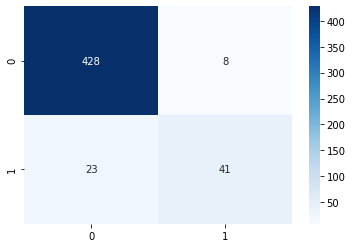

In [57]:
# visualização com heatmap do seaborn

sns.heatmap(cnn, annot=True, cmap='Blues', fmt='d');

In [58]:
# interpretação da matrix de confusão
# clientes que pagam o emprestimo e são aprovados com emprestimos

428 / ( 428 + 8 )

0.981651376146789

In [59]:
# clientes que não pagam o emprestimo e são reprovados com emprestimos
# com esse modelo quase 35% dos clientes são aprovados para emprestimo e tem uma alta probabilidade de não pagar o emprestimo

41 / ( 41 + 23 )

0.640625

In [60]:
# metricas de avaliacao do modelo

print(classification_report(y_credit_teste, previsoes_credit))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



In [61]:
# criando um modelo de arvore de decisao e treinando com a base de dados de treino

ad_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
ad_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [62]:
# fazendo previsoes com a base de dados de teste

previsoes_credit_ad = ad_credit.predict(X_credit_teste)
previsoes_credit_ad

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [63]:
# visualização do accuracy_score(precisão) da base de dados de teste

accuracy_score(y_credit_teste, previsoes_credit_ad)

0.982

In [64]:
# visualização da matriz de confusão

cnn = confusion_matrix(y_credit_teste, previsoes_credit_ad)
cnn

array([[430,   6],
       [  3,  61]], dtype=int64)

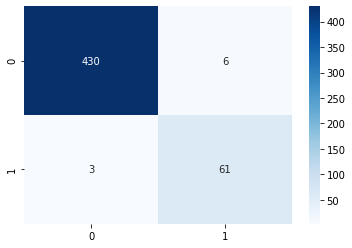

In [65]:
# visualização da matriz de confusão com heatmap do seaborn

sns.heatmap(cnn, annot=True, cmap='Blues', fmt='d');

In [66]:
# interpretação da matrix de confusão
# clientes que pagam o emprestimo e são aprovados com emprestimos

430 / ( 430 + 6 )

0.9862385321100917

In [67]:
# clientes que não pagam o emprestimo e são reprovados com emprestimos

61 / ( 61 + 3 )

0.953125

In [68]:
# metricas de avaliação do modelo

print(classification_report(y_credit_teste, previsoes_credit_ad))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



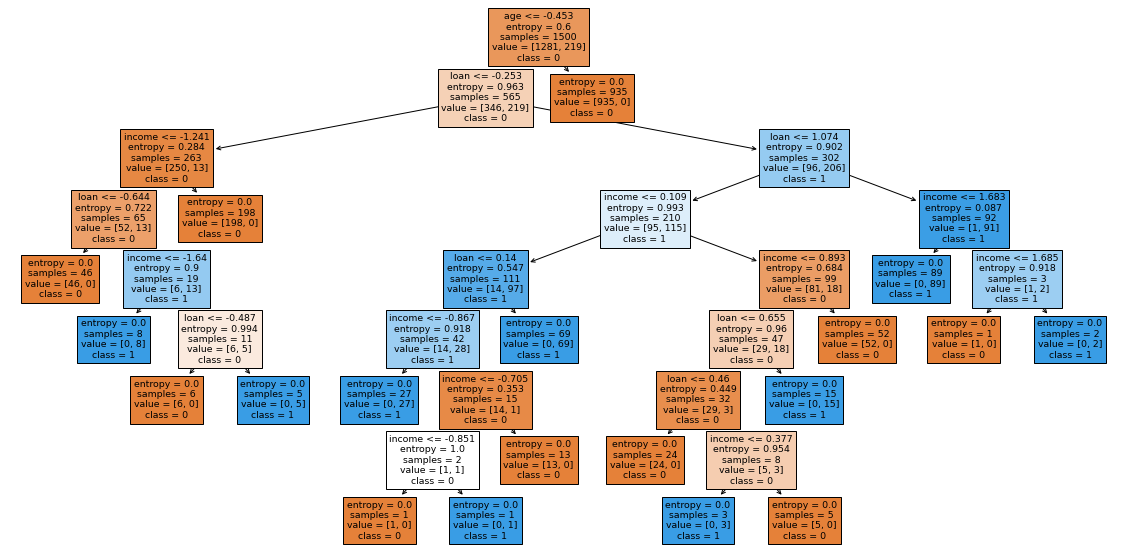

In [69]:
# visualização da árvore de decisão melhorada

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
previsores_ad = ['income', 'age', 'loan']
tree.plot_tree(ad_credit, feature_names=previsores_ad, class_names=['0', '1'], filled=True);

In [70]:
# criação de um modelo de randomForest e treinamento com a base de dados de treino

rf_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
rf_credit.fit(X_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [71]:
# fazendo previsoes com a base de dados de teste

previsoes_rf = rf_credit.predict(X_credit_teste)
previsoes_rf

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [72]:
# visualização do accuracy_score(precisão) da base de dados de teste

accuracy_score(y_credit_teste, previsoes_rf)

0.984

In [73]:
# visualização da matriz de confusão

cnn = confusion_matrix(y_credit_teste, previsoes_rf)
cnn

array([[433,   3],
       [  5,  59]], dtype=int64)

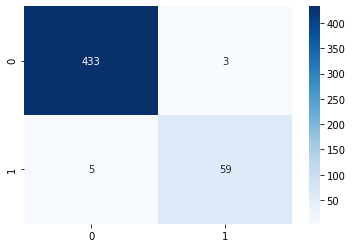

In [74]:
# visualização da matriz de confusão com heatmap do seaborn

sns.heatmap(cnn, annot=True, cmap='Blues', fmt='d');

In [75]:
# metricas de avaliação do modelo

print(classification_report(y_credit_teste, previsoes_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



In [76]:
# Classificação por instancias Knn

In [77]:
# criando um modelo de KNN e treinando com a base de dados de treino

knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_credit.fit(X_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [81]:
# previsoes com a base de dados de teste

previsoes_knn = knn_credit.predict(X_credit_teste)
previsoes_knn

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [82]:
# valores corretos da base de dados de teste

y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [83]:
# visualização do accuracy_score(precisão) da base de dados de teste

accuracy_score(y_credit_teste, previsoes_knn)

0.986

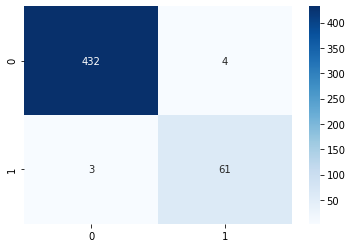

In [84]:
# visualização da matriz de confusão no seaborn

cnn = confusion_matrix(y_credit_teste, previsoes_knn)
sns.heatmap(cnn, annot=True, cmap='Blues', fmt='d');

In [85]:
# avaliação do modelo com classificatio_report

print(classification_report(y_credit_teste, previsoes_knn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500

